## deberta-large-v3-stratifiedkfold

In [1]:
# The following is necessary if you want to use the fast tokenizer for deberta v2 or v3
# This must be done before importing transformers
import shutil
from pathlib import Path

transformers_path = Path("/home/xiaoguzai/.local/lib/python3.9/site-packages/transformers")

input_dir = Path("/home/xiaoguzai/程序/NBME-Score Clinical Patient Notes/代码")

convert_file = input_dir / "convert_slow_tokenizer.py"
conversion_path = transformers_path/convert_file.name

if conversion_path.exists():
    conversion_path.unlink()

#print('convert_file = ')
#print(convert_file)
#print('conversion_path = ')
#print(conversion_path)
shutil.copy(convert_file, transformers_path)
deberta_v2_path = transformers_path 

for filename in ['tokenization_deberta_v2.py', 'tokenization_deberta_v2_fast.py']:
    filepath = deberta_v2_path/filename
    
    if filepath.exists():
        filepath.unlink()

    shutil.copy(input_dir/filename, filepath)
    
from transformers import AutoTokenizer,AutoModel,AutoConfig
from transformers.models.deberta_v2.tokenization_deberta_v2_fast import DebertaV2TokenizerFast
import transformers
tokenizer = DebertaV2TokenizerFast.from_pretrained('/home/xiaoguzai/模型/deberta-v3-large')

import os
import pandas as pd
import ast
import random
import numpy as np
import torch
train = pd.read_csv('/home/xiaoguzai/数据/NBME-Score Clinical Patient Notes/train.csv')

train['annotation'] = train['annotation'].apply(ast.literal_eval)
train['location'] = train['location'].apply(ast.literal_eval)
features = pd.read_csv('/home/xiaoguzai/数据/NBME-Score Clinical Patient Notes/features.csv')
features.loc[27, 'feature_text'] = "Last-Pap-smear-1-year-ago"

patient_notes = pd.read_csv('/home/xiaoguzai/数据/NBME-Score Clinical Patient Notes/patient_notes.csv')
train = train.merge(features, on=['feature_num','case_num'],how='left')
train.head()

train = train.merge(patient_notes, on=['pn_num','case_num'],how='left')
train.head()
#这里数据读取有bug，一个history被读取了好多次


import ast
# incorrect annotation
train.loc[338, 'annotation'] = ast.literal_eval('[["father heart attack"]]')
train.loc[338, 'location'] = ast.literal_eval('[["764 783"]]')

train.loc[621, 'annotation'] = ast.literal_eval('[["for the last 2-3 months"]]')
train.loc[621, 'location'] = ast.literal_eval('[["77 100"]]')

train.loc[655, 'annotation'] = ast.literal_eval('[["no heat intolerance"], ["no cold intolerance"]]')
train.loc[655, 'location'] = ast.literal_eval('[["285 292;301 312"], ["285 287;296 312"]]')

train.loc[1262, 'annotation'] = ast.literal_eval('[["mother thyroid problem"]]')
train.loc[1262, 'location'] = ast.literal_eval('[["551 557;565 580"]]')

train.loc[1265, 'annotation'] = ast.literal_eval('[[\'felt like he was going to "pass out"\']]')
train.loc[1265, 'location'] = ast.literal_eval('[["131 135;181 212"]]')

train.loc[1396, 'annotation'] = ast.literal_eval('[["stool , with no blood"]]')
train.loc[1396, 'location'] = ast.literal_eval('[["259 280"]]')

train.loc[1591, 'annotation'] = ast.literal_eval('[["diarrhoe non blooody"]]')
train.loc[1591, 'location'] = ast.literal_eval('[["176 184;201 212"]]')

train.loc[1615, 'annotation'] = ast.literal_eval('[["diarrhea for last 2-3 days"]]')
train.loc[1615, 'location'] = ast.literal_eval('[["249 257;271 288"]]')

train.loc[1664, 'annotation'] = ast.literal_eval('[["no vaginal discharge"]]')
train.loc[1664, 'location'] = ast.literal_eval('[["822 824;907 924"]]')

train.loc[1714, 'annotation'] = ast.literal_eval('[["started about 8-10 hours ago"]]')
train.loc[1714, 'location'] = ast.literal_eval('[["101 129"]]')

train.loc[1929, 'annotation'] = ast.literal_eval('[["no blood in the stool"]]')
train.loc[1929, 'location'] = ast.literal_eval('[["531 539;549 561"]]')

train.loc[2134, 'annotation'] = ast.literal_eval('[["last sexually active 9 months ago"]]')
train.loc[2134, 'location'] = ast.literal_eval('[["540 560;581 593"]]')

train.loc[2191, 'annotation'] = ast.literal_eval('[["right lower quadrant pain"]]')
train.loc[2191, 'location'] = ast.literal_eval('[["32 57"]]')

train.loc[2553, 'annotation'] = ast.literal_eval('[["diarrhoea no blood"]]')
train.loc[2553, 'location'] = ast.literal_eval('[["308 317;376 384"]]')

train.loc[3124, 'annotation'] = ast.literal_eval('[["sweating"]]')
train.loc[3124, 'location'] = ast.literal_eval('[["549 557"]]')

train.loc[3858, 'annotation'] = ast.literal_eval('[["previously as regular"], ["previously eveyr 28-29 days"], ["previously lasting 5 days"], ["previously regular flow"]]')
train.loc[3858, 'location'] = ast.literal_eval('[["102 123"], ["102 112;125 141"], ["102 112;143 157"], ["102 112;159 171"]]')

train.loc[4373, 'annotation'] = ast.literal_eval('[["for 2 months"]]')
train.loc[4373, 'location'] = ast.literal_eval('[["33 45"]]')

train.loc[4763, 'annotation'] = ast.literal_eval('[["35 year old"]]')
train.loc[4763, 'location'] = ast.literal_eval('[["5 16"]]')

train.loc[4782, 'annotation'] = ast.literal_eval('[["darker brown stools"]]')
train.loc[4782, 'location'] = ast.literal_eval('[["175 194"]]')

train.loc[4908, 'annotation'] = ast.literal_eval('[["uncle with peptic ulcer"]]')
train.loc[4908, 'location'] = ast.literal_eval('[["700 723"]]')

train.loc[6016, 'annotation'] = ast.literal_eval('[["difficulty falling asleep"]]')
train.loc[6016, 'location'] = ast.literal_eval('[["225 250"]]')

train.loc[6192, 'annotation'] = ast.literal_eval('[["helps to take care of aging mother and in-laws"]]')
train.loc[6192, 'location'] = ast.literal_eval('[["197 218;236 260"]]')

train.loc[6380, 'annotation'] = ast.literal_eval('[["No hair changes"], ["No skin changes"], ["No GI changes"], ["No palpitations"], ["No excessive sweating"]]')
train.loc[6380, 'location'] = ast.literal_eval('[["480 482;507 519"], ["480 482;499 503;512 519"], ["480 482;521 531"], ["480 482;533 545"], ["480 482;564 582"]]')

train.loc[6562, 'annotation'] = ast.literal_eval('[["stressed due to taking care of her mother"], ["stressed due to taking care of husbands parents"]]')
train.loc[6562, 'location'] = ast.literal_eval('[["290 320;327 337"], ["290 320;342 358"]]')

train.loc[6862, 'annotation'] = ast.literal_eval('[["stressor taking care of many sick family members"]]')
train.loc[6862, 'location'] = ast.literal_eval('[["288 296;324 363"]]')

train.loc[7022, 'annotation'] = ast.literal_eval('[["heart started racing and felt numbness for the 1st time in her finger tips"]]')
train.loc[7022, 'location'] = ast.literal_eval('[["108 182"]]')

train.loc[7422, 'annotation'] = ast.literal_eval('[["first started 5 yrs"]]')
train.loc[7422, 'location'] = ast.literal_eval('[["102 121"]]')

train.loc[8876, 'annotation'] = ast.literal_eval('[["No shortness of breath"]]')
train.loc[8876, 'location'] = ast.literal_eval('[["481 483;533 552"]]')

train.loc[9027, 'annotation'] = ast.literal_eval('[["recent URI"], ["nasal stuffines, rhinorrhea, for 3-4 days"]]')
train.loc[9027, 'location'] = ast.literal_eval('[["92 102"], ["123 164"]]')

train.loc[9938, 'annotation'] = ast.literal_eval('[["irregularity with her cycles"], ["heavier bleeding"], ["changes her pad every couple hours"]]')
train.loc[9938, 'location'] = ast.literal_eval('[["89 117"], ["122 138"], ["368 402"]]')

train.loc[9973, 'annotation'] = ast.literal_eval('[["gaining 10-15 lbs"]]')
train.loc[9973, 'location'] = ast.literal_eval('[["344 361"]]')

train.loc[10513, 'annotation'] = ast.literal_eval('[["weight gain"], ["gain of 10-16lbs"]]')
train.loc[10513, 'location'] = ast.literal_eval('[["600 611"], ["607 623"]]')

train.loc[11551, 'annotation'] = ast.literal_eval('[["seeing her son knows are not real"]]')
train.loc[11551, 'location'] = ast.literal_eval('[["386 400;443 461"]]')

train.loc[11677, 'annotation'] = ast.literal_eval('[["saw him once in the kitchen after he died"]]')
train.loc[11677, 'location'] = ast.literal_eval('[["160 201"]]')

train.loc[12124, 'annotation'] = ast.literal_eval('[["tried Ambien but it didnt work"]]')
train.loc[12124, 'location'] = ast.literal_eval('[["325 337;349 366"]]')

train.loc[12279, 'annotation'] = ast.literal_eval('[["heard what she described as a party later than evening these things did not actually happen"]]')
train.loc[12279, 'location'] = ast.literal_eval('[["405 459;488 524"]]')

train.loc[12289, 'annotation'] = ast.literal_eval('[["experienced seeing her son at the kitchen table these things did not actually happen"]]')
train.loc[12289, 'location'] = ast.literal_eval('[["353 400;488 524"]]')

train.loc[13238, 'annotation'] = ast.literal_eval('[["SCRACHY THROAT"], ["RUNNY NOSE"]]')
train.loc[13238, 'location'] = ast.literal_eval('[["293 307"], ["321 331"]]')

train.loc[13297, 'annotation'] = ast.literal_eval('[["without improvement when taking tylenol"], ["without improvement when taking ibuprofen"]]')
train.loc[13297, 'location'] = ast.literal_eval('[["182 221"], ["182 213;225 234"]]')

train.loc[13299, 'annotation'] = ast.literal_eval('[["yesterday"], ["yesterday"]]')
train.loc[13299, 'location'] = ast.literal_eval('[["79 88"], ["409 418"]]')

train.loc[13845, 'annotation'] = ast.literal_eval('[["headache global"], ["headache throughout her head"]]')
train.loc[13845, 'location'] = ast.literal_eval('[["86 94;230 236"], ["86 94;237 256"]]')

train.loc[14083, 'annotation'] = ast.literal_eval('[["headache generalized in her head"]]')
train.loc[14083, 'location'] = ast.literal_eval('[["56 64;156 179"]]')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=42)

from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
r"""
Fold = GroupKFold(n_splits=5)
groups = train['pn_num'].values
for n, (train_index,val_index) in enumerate(Fold.split(train,train['location'],groups)):
    train.loc[val_index, 'fold'] = int(n)
#按照groups也就是train['pn_num']进行划分
"""
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#splits = list(skf.split(train,train[]))
for n, (train_index,val_index) in enumerate(skf.split(X=train,y=train['case_num'],\
                                                     groups=train['pn_num'])):
    train.loc[val_index,'fold'] = int(n)
train['fold'] = train['fold'].astype(int)
train['annotation_length'] = train['annotation'].apply(len)

from sklearn.metrics import f1_score
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm
import torch.nn as nn

pn_history_lengths = []
for text in tqdm(patient_notes['pn_history'].fillna("").values,total=len(patient_notes)):
    length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
    pn_history_lengths.append(length)
    
features_lengths = []
for text in tqdm(features['feature_text'].fillna("").values, total=len(features)):
    length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
    features_lengths.append(length)
max_len = max(pn_history_lengths)+max(features_lengths)+3
print('max_len = %d'%max_len)

class TrainDataset(Dataset):
    def __init__(self,inputs,labels):
        self.inputs = inputs
        self.labels = labels
        self.tensors = [torch.tensor(self.inputs),\
                       torch.tensor(self.labels)]
        
    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
#下面prepare_input的时候将text和feature_text合在一起很巧妙
def prepare_input(text, feature_text):
    inputs = tokenizer.encode_plus(text+feature_text,\
                                add_special_tokens=True,\
                                max_length = max_len,\
                                padding = "max_length",\
                                return_offsets_mapping = False)
    for k, v in inputs.items():
        inputs[k] = torch.tensor(v,dtype=torch.long)
    return inputs,len(inputs['input_ids'])
    #return inputs,inputs['input_ids'].size(0)

#打标记的时候还是只放入text的内容，不考虑feature_text的文本内容
def create_label(text, annotation_length, location_list):
    encoded = tokenizer.encode_plus(text,\
                                add_special_tokens=True,\
                                max_length = max_len,\
                                padding = "max_length",\
                                return_offsets_mapping = True)
    offset_mapping = encoded['offset_mapping']
    ignore_idxes = np.where(np.array(encoded.sequence_ids()) != 0)[0]
    label = np.zeros(len(offset_mapping))
    label[ignore_idxes] = -1
    if annotation_length != 0:
        for location in location_list:
            #location = 2 4,location = 8 10
            for loc in [s.split() for s in location.split(';')]:
                #loc = ['2','4'],loc = ['8','10']
                start_idx = -1
                end_idx = -1
                start, end = int(loc[0]), int(loc[1])
                #start = 2,end = 4;start = 8,end = 10;
                #!!!这里的start,end标记的为字符:Character spans indicating 
                #the location of each annotation within the note.
                #注意前面的标注Character spans
                for idx in range(len(offset_mapping)):
                    if (start_idx == -1) & (start < offset_mapping[idx][0]):
                        start_idx = idx - 1
                        #print('111start_idx = %d 111'%start_idx)
                        #字符比当前字符小的时候，指向前一位
                    if (end_idx == -1) & (end <= offset_mapping[idx][1]):
                        end_idx = idx + 1
                        #字符比当前字符大的时候，指向后一位
                        #print('222start_idx = %d 222'%end_idx)
                if start_idx == -1:
                    start_idx = end_idx
                    #print('333start_idx = %d 333'%start_idx)
                if (start_idx != -1) & (end_idx != -1):
                    #print('***start_idx = %d***'%start_idx)
                    #print('***end_idx = %d***'%end_idx)
                    label[start_idx:end_idx] = 1
    return offset_mapping,label


def change_location_to_offset(text,location_list):
    results = np.zeros(len(text))
    #以char为级别计算，应该对整个text计算len
    for idx, offset_mapping in enumerate(location_list):
        try:
            start = (int)(offset_mapping[0])
            end = (int)(offset_mapping[1])
            results[start:end] = 1
        except:
            continue
    return results

    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class ClassificationModel(nn.Module):
    def __init__(self,model):
        super(ClassificationModel,self).__init__()
        self.model = model
        #self.dropout = nn.Dropout(0.2)
        #self.fc1 = nn.Linear(768,1)
        self.fc1 = nn.Linear(1024,1)
        #self.fc1 = nn.Linear(768,1)
        
    def forward(self,input_ids,token_type_ids,attention_mask):
        outputs = self.model(input_ids=input_ids,\
                           token_type_ids=token_type_ids,\
                           attention_mask=attention_mask)
        outputs = outputs[0]
        #outputs = self.dropout(outputs)
        outputs = self.fc1(outputs)
        return outputs

def get_predictions(results):
    predictions = []
    for result in results:
        prediction = []
        if result != "":
            for loc in [s.split() for s in result.split(';')]:
                start, end = int(loc[0]), int(loc[1])
                prediction.append([start, end])
        predictions.append(prediction)
    return predictions

def my_collate(batch):
    text_list,input_ids_list,offset_list = [],[],[]
    token_type_ids_list,attention_mask_list,origin_label_list = [],[],[]
    for data in batch:
        text_list.append(data[0])
        input_ids_list.append(data[1].tolist())
        offset_list.append(data[2])
        token_type_ids_list.append(data[3].tolist())
        attention_mask_list.append(data[4].tolist())
        #current_data_list = get_predictions(data[5])
        current_data_list = []
        for data1 in data[5]:
            if ' ' in data1:
                for data2 in data1.split(';'):
                    data3 = data2.split(' ')
                    current_data_list.append([(int)(data3[0]),(int)(data3[1])])
        origin_label_list.append(current_data_list)
    input_ids_list = torch.tensor(input_ids_list)
    token_type_ids_list = torch.tensor(token_type_ids_list)
    attention_mask_list = torch.tensor(attention_mask_list)
    return text_list,input_ids_list,offset_list,\
           token_type_ids_list,attention_mask_list,origin_label_list

class TrainDataset(Dataset):
    def __init__(self,text,input_ids,offset,token_type_ids,attention_mask,label):
        self.input_ids = input_ids
        self.tensors = [text,\
                        torch.tensor(input_ids,dtype=torch.long),\
                        torch.tensor(offset),\
                       torch.tensor(token_type_ids,dtype=torch.long),\
                       torch.tensor(attention_mask,dtype=torch.long),\
                       torch.tensor(label)]
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
    

class ValidDataset(Dataset):
    def __init__(self,text,input_ids,offset,token_type_ids,attention_mask,origin_label):
        self.input_ids = input_ids
        self.tensors = [text,\
                        torch.tensor(input_ids,dtype=torch.long),\
                        torch.tensor(offset),\
                        torch.tensor(token_type_ids,dtype=torch.long),\
                        torch.tensor(attention_mask,dtype=torch.long),\
                        origin_label]
        #这里origin_label放入的为['']
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
    
def compute_multilabel_loss(model,batch_token_ids,\
                            batch_token_type_ids,\
                            batch_attention_mask,\
                            batch_label):
    with torch.cuda.amp.autocast(enabled=True):
        logit = model(input_ids=batch_token_ids,\
                     attention_mask=batch_attention_mask,\
                     token_type_ids=batch_token_type_ids)
    logit = logit.view(-1,1)
    batch_label = batch_label.view(-1,1)
    loss_fn = nn.BCEWithLogitsLoss(reduction="none")
    loss = loss_fn(logit,batch_label)
    torch.set_printoptions(threshold=np.inf)
    loss = torch.masked_select(loss,batch_label!=-1)
    loss = loss.mean()
    #这里的loss不要勿写成logit
    return loss

def get_char_probs(total_text,offsets,predictions):
    results = [np.zeros(len(t)) for t in total_text]
    #!!!results 长短不一!!!
    #以char为级别计算，应该对整个text计算len
    torch.set_printoptions(threshold=np.inf)
    for i, (offset, prediction) in enumerate(zip(offsets, predictions)):
        for idx, (offset_mapping, pred) in enumerate(zip(offset, prediction)):
            start = offset_mapping[0]
            end = offset_mapping[1]
            #results[i][start:end] = ((float)(pred[0].item(),)
            results[i][start:end] = pred[0].item()
    return results

from transformers import DebertaV2Model,DebertaModel
from torch.optim.lr_scheduler import LambdaLR
import itertools
deberta = DebertaV2Model.from_pretrained("/home/xiaoguzai/模型/deberta-v3-large")
#deberta = DebertaModel.from_pretrained("/home/xiaoguzai/模型/deberta")
model = ClassificationModel(deberta)

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def get_results(char_probs, th=0.5):
    results = []
    for char_prob in char_probs:
        result = np.where(char_prob >= th)[0] + 1
        result = [list(g) for _, g in itertools.groupby(result, key=lambda n, c=itertools.count(): n - next(c))]
        result = [f"{min(r)} {max(r)}" for r in result]
        result = ";".join(result)
        results.append(result)
    return results


def get_predictions(results):
    predictions = []
    for result in results:
        prediction = []
        if result != "":
            for loc in [s.split() for s in result.split(';')]:
                start, end = int(loc[0]), int(loc[1])
                prediction.append([start, end])
        predictions.append(prediction)
    return predictions

def get_score(y_true, y_pred):
    score = span_micro_f1(y_true, y_pred)
    return score

def micro_f1(preds, truths):
    """
    Micro f1 on binary arrays.

    Args:
        preds (list of lists of ints): Predictions.
        truths (list of lists of ints): Ground truths.

    Returns:
        float: f1 score.
    """
    # Micro : aggregating over all instances
    preds = np.concatenate(preds)
    truths = np.concatenate(truths)
    return f1_score(truths, preds)


def spans_to_binary(spans, length=None):
    """
    Converts spans to a binary array indicating whether each character is in the span.

    Args:
        spans (list of lists of two ints): Spans.

    Returns:
        np array [length]: Binarized spans.
    """
    length = np.max(spans) if length is None else length
    binary = np.zeros(length)
    for start, end in spans:
        binary[start:end] = 1
    return binary


def span_micro_f1(preds, truths):
    """
    Micro f1 on spans.

    Args:
        preds (list of lists of two ints): Prediction spans.
        truths (list of lists of two ints): Ground truth spans.

    Returns:
        float: f1 score.
    """
    bin_preds = []
    bin_truths = []
    for pred, truth in zip(preds, truths):
        if not len(pred) and not len(truth):
            continue
        length = max(np.max(pred) if len(pred) else 0, np.max(truth) if len(truth) else 0)
        bin_preds.append(spans_to_binary(pred, length))
        bin_truths.append(spans_to_binary(truth, length))
    return micro_f1(bin_preds, bin_truths)

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=42)

from transformers import DebertaV2Model,DebertaModel
from torch.optim.lr_scheduler import LambdaLR
import itertools    
from tqdm import tqdm

bestpointlist = [0.0,0.0,0.0,0.0,0.0]
for current_fold in range(0,5):
    train_data = train[train['fold'] != current_fold]
    valid_data = train[train['fold'] == current_fold]
    train_text,valid_text = [],[]
    train_input_ids,train_token_type_ids,train_attention_mask = [],[],[]
    train_offset,train_label = [],[]
    train_length = []
    valid_input_ids,valid_token_type_ids,valid_attention_mask = [],[],[]
    valid_offset,valid_label = [],[]
    valid_length = []
    train_origin_label,valid_origin_label = [],[]

    for  index,data  in  tqdm(train_data.iterrows(),total=len(train_data)):
        #!!!数据这里出现bug，读取的都是一组数据!!!
        text = data['pn_history']
        feature_text = data['feature_text']
        #print('text = ')
        #print(text)
        inputs,length = prepare_input(text,feature_text)
        #train_text.append(text+feature_text)
        train_text.append(text)
        train_input_ids.append(inputs['input_ids'].tolist())
        train_token_type_ids.append(inputs['token_type_ids'].tolist())
        train_attention_mask.append(inputs['attention_mask'].tolist())

        annotation_length = data['annotation_length']

        current_offset,current_label = create_label(text,annotation_length=data['annotation_length'],\
                                        location_list=data['location'])
        true_label = change_location_to_offset(text,data['location'])
        train_origin_label.append(true_label)
        train_offset.append(current_offset)
        train_label.append(current_label)
        train_length.append(length)

    for index,data in tqdm(valid_data.iterrows(),total=len(valid_data)):
        text = data['pn_history']
        feature_text = data['feature_text']
        inputs,length = prepare_input(text,feature_text)
        #valid_text.append(text+feature_text)
        valid_text.append(text)
        valid_input_ids.append(inputs['input_ids'].tolist())
        valid_token_type_ids.append(inputs['token_type_ids'].tolist())
        valid_attention_mask.append(inputs['attention_mask'].tolist())
        annotation_length = data['annotation_length']
        current_offset,current_label = create_label(text,annotation_length=data['annotation_length'],\
                                     location_list=data['location'])
        #true_label = change_location_to_offset(text,data['location'])
        #发生bug的地方，true_label的标记错误
        valid_offset.append(current_offset)
        valid_label.append(data['location'])
        valid_length.append(length)

    train_dataset = TrainDataset(train_text,\
                                 train_input_ids,\
                                 train_offset,\
                                train_token_type_ids,\
                                train_attention_mask,\
                                train_label)
    valid_dataset = ValidDataset(valid_text,\
                                 valid_input_ids,\
                                 valid_offset,\
                                valid_token_type_ids,\
                                valid_attention_mask,\
                                valid_label)

    batch_size = 4
    train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    valid_loader = DataLoader(valid_dataset,batch_size=batch_size,shuffle=False,collate_fn = my_collate)
    #bcewithlogitloss有sigmoid函数,batch_size必须要大
    bestpoint = 0.0
    gradient_accumulation_steps = 4
    #梯度累积的步数，每训练两次增加一步
    
    deberta = DebertaV2Model.from_pretrained("/home/xiaoguzai/模型/deberta-v3-large")
    model = ClassificationModel(deberta)
    
    optimizer = torch.optim.AdamW(model.parameters(),lr=1e-5)
    def lr_lambda(epoch):
        if epoch > 5:
            return 1
        else:
            return 2/(epoch+1)    
    
    scheduler = LambdaLR(optimizer, lr_lambda)
    scaler = torch.cuda.amp.GradScaler(enabled=True)
    for epoch in range(10):
        
        model.train()
        model.to(device)
        #model = torch.load("/home/xiaoguzai/程序/NBME-Score Clinical Patient Notes/best_point=0.8127543174426041.pth")
        losses = AverageMeter()

        step = 0
        prebig = True
        for batch_text,batch_ids,batch_offset,batch_token_type_ids,batch_attention_mask,batch_label in tqdm(train_loader):
            batch_ids = batch_ids.to(device)
            batch_token_type_ids = batch_token_type_ids.to(device)
            batch_attention_mask = batch_attention_mask.to(device)
            batch_label = batch_label.to(device)
            loss = compute_multilabel_loss(model,batch_ids,\
                                batch_token_type_ids,\
                                batch_attention_mask,\
                                batch_label)
            if gradient_accumulation_steps > 1:
                loss = loss/gradient_accumulation_steps
            losses.update(loss.item(),batch_size)

            scaler.scale(loss).backward()
            #loss.backward()
            #每一次进行相应的梯度计算
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
            #防止梯度爆炸，超过1000的部分不予计算
            if (step+1)%gradient_accumulation_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            step = step+1
        scheduler.step()

        model.eval()
        pred_result = []
        label_result = []
        for batch_text,batch_ids,batch_offset,batch_token_type_ids,batch_attention_mask,batch_origin_label in tqdm(valid_loader):
            batch_ids = batch_ids.to(device)
            batch_token_type_ids = batch_token_type_ids.to(device)
            batch_attention_mask = batch_attention_mask.to(device)
            with torch.no_grad():
                logit = model(input_ids=batch_ids,token_type_ids=batch_token_type_ids,\
                              attention_mask=batch_attention_mask)
                #logit = model(input_ids=batch_ids)
                #logit = (4,512,1)
                #!!!这点判断需要注意应该是以字符的形式进行判断!!!
                #输入的id应该为text+symptom，但是判断正负的时候只应该判断text的内容
                #torch.set_printoptions(threshold=np.inf)
                logit = torch.sigmoid(logit)
                #加上symptom得到的正常的logit
                preds = get_char_probs(batch_text,batch_offset,\
                                       logit.cpu())
                results = get_results(preds,th=0.5)
                preds = get_predictions(results)
                truths = batch_origin_label
                r"""
                preds = 
                [[[696, 722]], [[668, 693]], [[203, 217]], [[70, 91]]]
                truths = 
                [[[696, 724]], [[668, 693]], [[203, 217]], [[70, 91], [176, 183]]]
                """
                for data in preds:
                    pred_result.append(data)
                for data in truths:
                    label_result.append(data)


        point = get_score(pred_result,label_result)
        print('epoch = ')
        print(epoch)
        print('point = ')
        print(point)
        if point > bestpoint:
            bestpoint = point 
            prebig = True
            torch.save(model,'deberta-nocapitalize-Stratified-KFold-best_point='+str(bestpoint)+'_fold='+str(current_fold)+'.pth')
        else:
            prebig = False

        if prebig and point < bestpoint:
            break
        bestpointlist[current_fold] = max(bestpointlist[current_fold],bestpoint)

100%|██████████████████████████████████████| 143/143 [00:00<00:00, 26844.45it/s]


max_len = 354


Some weights of the model checkpoint at /home/xiaoguzai/模型/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████

epoch = 
0
point = 
0.815990577281714


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.06it/s]


epoch = 
1
point = 
0.8630781357268175


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.08it/s]


epoch = 
2
point = 
0.8746267106390714


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.05it/s]


epoch = 
3
point = 
0.8726253664458306


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
4
point = 
0.8757561296480207


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.06it/s]


epoch = 
5
point = 
0.8762436052340676


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.04it/s]


epoch = 
6
point = 
0.8756212415700291


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.07it/s]


epoch = 
7
point = 
0.8704034828578093


 21%|████████▌                               | 610/2860 [02:05<07:40,  4.89it/s]/tmp/ipykernel_6469/4193263903.py:656: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.05it/s]


epoch = 
8
point = 
0.8639534430573779


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.06it/s]


epoch = 
9
point = 
0.8691615897882216


100%|█████████████████████████████████████| 2860/2860 [00:02<00:00, 1132.92it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

epoch = 
0
point = 
0.8411430083344357


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.06it/s]


epoch = 
1
point = 
0.8698573982231899


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.01it/s]


epoch = 
2
point = 
0.8734097796051316


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.02it/s]


epoch = 
3
point = 
0.8781456953642384


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.05it/s]


epoch = 
4
point = 
0.8763310048923423


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.00it/s]


epoch = 
5
point = 
0.8746493781423657


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.04it/s]


epoch = 
6
point = 
0.8706341669304631


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.00it/s]


epoch = 
7
point = 
0.8701208240683688


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.01it/s]


epoch = 
8
point = 
0.873641322379859


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.04it/s]


epoch = 
9
point = 
0.8765718153653901


100%|█████████████████████████████████████| 2860/2860 [00:02<00:00, 1027.30it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

epoch = 
0
point = 
0.8326156097835571


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.98it/s]


epoch = 
1
point = 
0.8691285617895885


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
2
point = 
0.8794106446402542


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
3
point = 
0.8802137764078684


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
4
point = 
0.8781082782499213


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.98it/s]


epoch = 
5
point = 
0.8787169801456076


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
6
point = 
0.8747581307816682


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.98it/s]


epoch = 
7
point = 
0.8751863038632496


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
8
point = 
0.8802491196720451


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
9
point = 
0.8702092797101255


100%|█████████████████████████████████████| 2860/2860 [00:02<00:00, 1128.14it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

epoch = 
0
point = 
0.8369739631525317


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
1
point = 
0.878340902696837


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.02it/s]


epoch = 
2
point = 
0.8792217182672715


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.98it/s]


epoch = 
3
point = 
0.880380566490146


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 11.00it/s]


epoch = 
4
point = 
0.879686669174005


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
5
point = 
0.8822230064436863


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.00it/s]


epoch = 
6
point = 
0.8753541819708259


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
7
point = 
0.8730507614873388


 89%|██████████████████████████████████▊    | 2549/2860 [08:44<01:04,  4.82it/s]/tmp/ipykernel_6469/4193263903.py:656: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
8
point = 
0.8700081822260933


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 11.00it/s]


epoch = 
9
point = 
0.8739988228972083


100%|█████████████████████████████████████| 2860/2860 [00:02<00:00, 1134.11it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

epoch = 
0
point = 
0.8331899101812511


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.02it/s]


epoch = 
1
point = 
0.8704034454366965


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
2
point = 
0.8783665256423485


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 11.00it/s]


epoch = 
3
point = 
0.8837831172034217


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
4
point = 
0.8817144306365712


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.99it/s]


epoch = 
5
point = 
0.8846703408858949


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.98it/s]


epoch = 
6
point = 
0.8811967707015507


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
7
point = 
0.8777972962651798


100%|█████████████████████████████████████████| 715/715 [01:05<00:00, 10.98it/s]


epoch = 
8
point = 
0.8817274447126362


100%|█████████████████████████████████████████| 715/715 [01:04<00:00, 11.03it/s]


epoch = 
9
point = 
0.8762098173545327


## Roberta-capitalize-groupkfold

100%|██████████████████████████████████████| 143/143 [00:00<00:00, 24961.94it/s]


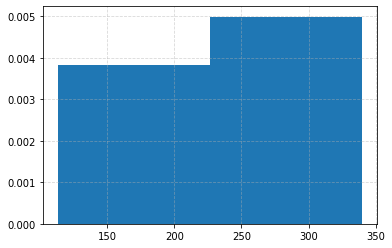

************current_fold = 0************


100%|██████████████████████████████████████| 2860/2860 [00:03<00:00, 716.08it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/roberta-english-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


epoch = 0


  0%|                                                  | 0/2860 [00:00<?, ?it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.8075900123059823
epoch = 1


 22%|████████▊                               | 626/2860 [01:25<04:58,  7.48it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.82it/s]


point = 
0.8476850182829478
epoch = 2


100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.8577770364763091
epoch = 3


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.859001610305958
epoch = 4


 28%|███████████▎                            | 806/2860 [01:49<04:34,  7.49it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.862520836004616
epoch = 5


100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.865351794582248
epoch = 6


 19%|███████▌                                | 538/2860 [01:13<05:10,  7.49it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.82it/s]


point = 
0.8471312465817891
epoch = 7


  3%|█▍                                       | 96/2860 [00:13<06:40,  6.91it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.8583880297407589
epoch = 8


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.8650847806774729
epoch = 9


100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.91it/s]


point = 
0.8629536677026307
************current_fold = 1************


100%|██████████████████████████████████████| 2860/2860 [00:03<00:00, 796.83it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/roberta-english-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


epoch = 0


  0%|                                                  | 0/2860 [00:00<?, ?it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.8092522263831364
epoch = 1


 13%|█████▎                                  | 382/2860 [00:51<05:31,  7.49it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.8466492090637024
epoch = 2


 69%|███████████████████████████            | 1980/2860 [04:29<02:04,  7.09it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.85057500220428
epoch = 3


 14%|█████▌                                  | 401/2860 [00:54<05:37,  7.29it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.94it/s]


point = 
0.859656602457269
epoch = 4


 23%|█████████▏                              | 657/2860 [01:29<05:03,  7.26it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.8670720433327692
epoch = 5


  8%|███▎                                    | 239/2860 [00:32<05:42,  7.65it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.91it/s]


point = 
0.8709207191353566
epoch = 6


 39%|███████████████▍                       | 1129/2860 [02:33<03:58,  7.25it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.87it/s]


point = 
0.8545876709532557
epoch = 7


  3%|█▏                                       | 84/2860 [00:11<06:30,  7.10it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.90it/s]


point = 
0.8638156610037102
epoch = 8


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.8665596146126054
epoch = 9


 77%|█████████████████████████████▉         | 2193/2860 [04:57<01:31,  7.26it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.8605365765486611
************current_fold = 2************


100%|██████████████████████████████████████| 2860/2860 [00:03<00:00, 794.79it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/roberta-english-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


epoch = 0


  0%|                                                  | 0/2860 [00:00<?, ?it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.82it/s]


point = 
0.821836717914988
epoch = 1


  6%|██▎                                     | 166/2860 [00:22<05:58,  7.50it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.848796113677578
epoch = 2


100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.8579534312123311
epoch = 3


 13%|█████▎                                  | 384/2860 [00:52<05:48,  7.10it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.863143560467187
epoch = 4


 29%|███████████▌                            | 830/2860 [01:52<04:31,  7.48it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.94it/s]


point = 
0.8642327590804842
epoch = 5


 10%|████                                    | 286/2860 [00:38<05:44,  7.47it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.86it/s]


point = 
0.8682974846030036
epoch = 6


 61%|███████████████████████▊               | 1745/2860 [03:56<02:32,  7.30it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.91it/s]


point = 
0.8597048087605142
epoch = 7


 16%|██████▌                                 | 466/2860 [01:03<05:24,  7.38it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.86it/s]


point = 
0.8576470285169634
epoch = 8


 26%|██████████▎                             | 741/2860 [01:40<04:50,  7.28it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.91it/s]


point = 
0.8612787451814437
epoch = 9


 72%|████████████████████████████           | 2060/2860 [04:38<01:52,  7.11it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.8654561948850674
************current_fold = 3************


100%|██████████████████████████████████████| 2860/2860 [00:03<00:00, 745.90it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/roberta-english-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


epoch = 0


  0%|                                                  | 0/2860 [00:00<?, ?it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.96it/s]


point = 
0.8070309083470876
epoch = 1


  3%|█▏                                       | 84/2860 [00:11<06:30,  7.11it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.83it/s]


point = 
0.8523698628292973
epoch = 2


 22%|████████▉                               | 643/2860 [01:27<04:50,  7.64it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.8650117168387712
epoch = 3


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.868933237989989
epoch = 4


 15%|█████▉                                  | 423/2860 [00:57<05:18,  7.65it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.8686529475314667
epoch = 5


 32%|████████████▉                           | 923/2860 [02:05<04:12,  7.68it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.85it/s]


point = 
0.8696266968325792
epoch = 6


 16%|██████▌                                 | 469/2860 [01:03<05:28,  7.27it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.90it/s]


point = 
0.8569896691513011
epoch = 7


 58%|██████████████████████▌                | 1652/2860 [03:44<02:49,  7.11it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.94it/s]


point = 
0.8697704468441386
epoch = 8


 27%|██████████▌                             | 759/2860 [01:42<04:34,  7.65it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.864887000588672
epoch = 9


100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.867911479944675
************current_fold = 4************


100%|██████████████████████████████████████| 2860/2860 [00:03<00:00, 810.88it/s]
Some weights of the model checkpoint at /home/xiaoguzai/模型/roberta-english-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


epoch = 0


  0%|                                                  | 0/2860 [00:00<?, ?it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.8145588344976755
epoch = 1


100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.8435756379934404
epoch = 2


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.83it/s]


point = 
0.8550257483722662
epoch = 3


  9%|███▌                                    | 252/2860 [00:34<06:06,  7.12it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.93it/s]


point = 
0.859994184048431
epoch = 4


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.86it/s]


point = 
0.8690014321051948
epoch = 5


100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.88it/s]


point = 
0.868970182650778
epoch = 6


  3%|█                                        | 72/2860 [00:09<06:33,  7.08it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.85it/s]


point = 
0.8623545954237505
epoch = 7


 55%|█████████████████████▍                 | 1568/2860 [03:33<03:02,  7.08it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.88it/s]


point = 
0.8627579761032662
epoch = 8


 46%|██████████████████                     | 1320/2860 [02:59<03:36,  7.11it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:45<00:00, 15.84it/s]


point = 
0.8675375316825891
epoch = 9


 25%|█████████▊                              | 703/2860 [01:35<04:41,  7.67it/s]/tmp/ipykernel_6469/112343667.py:671: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
100%|█████████████████████████████████████████| 715/715 [00:44<00:00, 15.92it/s]


point = 
0.845592410497888


In [2]:
from transformers import AutoTokenizer,DebertaV2Tokenizer
from transformers import RobertaModel,RobertaTokenizerFast
tokenizer = AutoTokenizer.from_pretrained('/home/xiaoguzai/模型/roberta-english-large',\
                                         trim_offsets=False)
import os
import pandas as pd
import ast
import random
import numpy as np
import torch
train = pd.read_csv('/home/xiaoguzai/数据/NBME-Score Clinical Patient Notes/train.csv')

train['annotation'] = train['annotation'].apply(ast.literal_eval)
train['location'] = train['location'].apply(ast.literal_eval)
features = pd.read_csv('/home/xiaoguzai/数据/NBME-Score Clinical Patient Notes/features.csv')
features.loc[27, 'feature_text'] = "Last-Pap-smear-1-year-ago"

patient_notes = pd.read_csv('/home/xiaoguzai/数据/NBME-Score Clinical Patient Notes/patient_notes.csv')
train = train.merge(features, on=['feature_num','case_num'],how='left')
train.head()

train = train.merge(patient_notes, on=['pn_num','case_num'],how='left')
train.head()

import re
def process_feature_text(text):
    text = re.sub('I-year', '1-year', text)
    text = re.sub('-OR-', " or ", text)
    text = re.sub('-', ' ', text)
    return text


def clean_spaces(txt):
    txt = re.sub('\n', ' ', txt)
    txt = re.sub('\t', ' ', txt)
    txt = re.sub('\r', ' ', txt)
#    txt = re.sub(r'\s+', ' ', txt)
    return txt
train["feature_text"] = train["feature_text"].apply(process_feature_text)
train["pn_history"] = train["pn_history"].apply(clean_spaces)
train["feature_text"] = train["feature_text"].apply(clean_spaces)
#!!!不加capitalize()得分0.852(maxlen=310),加capitalize()得分0.861
#测试maxlen=466+capitalize=0.670,maxlen=350+capitalize()=0.8693
train["pn_history"] = train["pn_history"].apply(lambda x:x.capitalize())

import ast
# incorrect annotation
train.loc[338, 'annotation'] = ast.literal_eval('[["father heart attack"]]')
train.loc[338, 'location'] = ast.literal_eval('[["764 783"]]')

train.loc[621, 'annotation'] = ast.literal_eval('[["for the last 2-3 months"]]')
train.loc[621, 'location'] = ast.literal_eval('[["77 100"]]')

train.loc[655, 'annotation'] = ast.literal_eval('[["no heat intolerance"], ["no cold intolerance"]]')
train.loc[655, 'location'] = ast.literal_eval('[["285 292;301 312"], ["285 287;296 312"]]')

train.loc[1262, 'annotation'] = ast.literal_eval('[["mother thyroid problem"]]')
train.loc[1262, 'location'] = ast.literal_eval('[["551 557;565 580"]]')

train.loc[1265, 'annotation'] = ast.literal_eval('[[\'felt like he was going to "pass out"\']]')
train.loc[1265, 'location'] = ast.literal_eval('[["131 135;181 212"]]')

train.loc[1396, 'annotation'] = ast.literal_eval('[["stool , with no blood"]]')
train.loc[1396, 'location'] = ast.literal_eval('[["259 280"]]')

train.loc[1591, 'annotation'] = ast.literal_eval('[["diarrhoe non blooody"]]')
train.loc[1591, 'location'] = ast.literal_eval('[["176 184;201 212"]]')

train.loc[1615, 'annotation'] = ast.literal_eval('[["diarrhea for last 2-3 days"]]')
train.loc[1615, 'location'] = ast.literal_eval('[["249 257;271 288"]]')

train.loc[1664, 'annotation'] = ast.literal_eval('[["no vaginal discharge"]]')
train.loc[1664, 'location'] = ast.literal_eval('[["822 824;907 924"]]')

train.loc[1714, 'annotation'] = ast.literal_eval('[["started about 8-10 hours ago"]]')
train.loc[1714, 'location'] = ast.literal_eval('[["101 129"]]')

train.loc[1929, 'annotation'] = ast.literal_eval('[["no blood in the stool"]]')
train.loc[1929, 'location'] = ast.literal_eval('[["531 539;549 561"]]')

train.loc[2134, 'annotation'] = ast.literal_eval('[["last sexually active 9 months ago"]]')
train.loc[2134, 'location'] = ast.literal_eval('[["540 560;581 593"]]')

train.loc[2191, 'annotation'] = ast.literal_eval('[["right lower quadrant pain"]]')
train.loc[2191, 'location'] = ast.literal_eval('[["32 57"]]')

train.loc[2553, 'annotation'] = ast.literal_eval('[["diarrhoea no blood"]]')
train.loc[2553, 'location'] = ast.literal_eval('[["308 317;376 384"]]')

train.loc[3124, 'annotation'] = ast.literal_eval('[["sweating"]]')
train.loc[3124, 'location'] = ast.literal_eval('[["549 557"]]')

train.loc[3858, 'annotation'] = ast.literal_eval('[["previously as regular"], ["previously eveyr 28-29 days"], ["previously lasting 5 days"], ["previously regular flow"]]')
train.loc[3858, 'location'] = ast.literal_eval('[["102 123"], ["102 112;125 141"], ["102 112;143 157"], ["102 112;159 171"]]')

train.loc[4373, 'annotation'] = ast.literal_eval('[["for 2 months"]]')
train.loc[4373, 'location'] = ast.literal_eval('[["33 45"]]')

train.loc[4763, 'annotation'] = ast.literal_eval('[["35 year old"]]')
train.loc[4763, 'location'] = ast.literal_eval('[["5 16"]]')

train.loc[4782, 'annotation'] = ast.literal_eval('[["darker brown stools"]]')
train.loc[4782, 'location'] = ast.literal_eval('[["175 194"]]')

train.loc[4908, 'annotation'] = ast.literal_eval('[["uncle with peptic ulcer"]]')
train.loc[4908, 'location'] = ast.literal_eval('[["700 723"]]')

train.loc[6016, 'annotation'] = ast.literal_eval('[["difficulty falling asleep"]]')
train.loc[6016, 'location'] = ast.literal_eval('[["225 250"]]')

train.loc[6192, 'annotation'] = ast.literal_eval('[["helps to take care of aging mother and in-laws"]]')
train.loc[6192, 'location'] = ast.literal_eval('[["197 218;236 260"]]')

train.loc[6380, 'annotation'] = ast.literal_eval('[["No hair changes"], ["No skin changes"], ["No GI changes"], ["No palpitations"], ["No excessive sweating"]]')
train.loc[6380, 'location'] = ast.literal_eval('[["480 482;507 519"], ["480 482;499 503;512 519"], ["480 482;521 531"], ["480 482;533 545"], ["480 482;564 582"]]')

train.loc[6562, 'annotation'] = ast.literal_eval('[["stressed due to taking care of her mother"], ["stressed due to taking care of husbands parents"]]')
train.loc[6562, 'location'] = ast.literal_eval('[["290 320;327 337"], ["290 320;342 358"]]')

train.loc[6862, 'annotation'] = ast.literal_eval('[["stressor taking care of many sick family members"]]')
train.loc[6862, 'location'] = ast.literal_eval('[["288 296;324 363"]]')

train.loc[7022, 'annotation'] = ast.literal_eval('[["heart started racing and felt numbness for the 1st time in her finger tips"]]')
train.loc[7022, 'location'] = ast.literal_eval('[["108 182"]]')

train.loc[7422, 'annotation'] = ast.literal_eval('[["first started 5 yrs"]]')
train.loc[7422, 'location'] = ast.literal_eval('[["102 121"]]')

train.loc[8876, 'annotation'] = ast.literal_eval('[["No shortness of breath"]]')
train.loc[8876, 'location'] = ast.literal_eval('[["481 483;533 552"]]')

train.loc[9027, 'annotation'] = ast.literal_eval('[["recent URI"], ["nasal stuffines, rhinorrhea, for 3-4 days"]]')
train.loc[9027, 'location'] = ast.literal_eval('[["92 102"], ["123 164"]]')

train.loc[9938, 'annotation'] = ast.literal_eval('[["irregularity with her cycles"], ["heavier bleeding"], ["changes her pad every couple hours"]]')
train.loc[9938, 'location'] = ast.literal_eval('[["89 117"], ["122 138"], ["368 402"]]')

train.loc[9973, 'annotation'] = ast.literal_eval('[["gaining 10-15 lbs"]]')
train.loc[9973, 'location'] = ast.literal_eval('[["344 361"]]')

train.loc[10513, 'annotation'] = ast.literal_eval('[["weight gain"], ["gain of 10-16lbs"]]')
train.loc[10513, 'location'] = ast.literal_eval('[["600 611"], ["607 623"]]')

train.loc[11551, 'annotation'] = ast.literal_eval('[["seeing her son knows are not real"]]')
train.loc[11551, 'location'] = ast.literal_eval('[["386 400;443 461"]]')

train.loc[11677, 'annotation'] = ast.literal_eval('[["saw him once in the kitchen after he died"]]')
train.loc[11677, 'location'] = ast.literal_eval('[["160 201"]]')

train.loc[12124, 'annotation'] = ast.literal_eval('[["tried Ambien but it didnt work"]]')
train.loc[12124, 'location'] = ast.literal_eval('[["325 337;349 366"]]')

train.loc[12279, 'annotation'] = ast.literal_eval('[["heard what she described as a party later than evening these things did not actually happen"]]')
train.loc[12279, 'location'] = ast.literal_eval('[["405 459;488 524"]]')

train.loc[12289, 'annotation'] = ast.literal_eval('[["experienced seeing her son at the kitchen table these things did not actually happen"]]')
train.loc[12289, 'location'] = ast.literal_eval('[["353 400;488 524"]]')

train.loc[13238, 'annotation'] = ast.literal_eval('[["SCRACHY THROAT"], ["RUNNY NOSE"]]')
train.loc[13238, 'location'] = ast.literal_eval('[["293 307"], ["321 331"]]')

train.loc[13297, 'annotation'] = ast.literal_eval('[["without improvement when taking tylenol"], ["without improvement when taking ibuprofen"]]')
train.loc[13297, 'location'] = ast.literal_eval('[["182 221"], ["182 213;225 234"]]')

train.loc[13299, 'annotation'] = ast.literal_eval('[["yesterday"], ["yesterday"]]')
train.loc[13299, 'location'] = ast.literal_eval('[["79 88"], ["409 418"]]')

train.loc[13845, 'annotation'] = ast.literal_eval('[["headache global"], ["headache throughout her head"]]')
train.loc[13845, 'location'] = ast.literal_eval('[["86 94;230 236"], ["86 94;237 256"]]')

train.loc[14083, 'annotation'] = ast.literal_eval('[["headache generalized in her head"]]')
train.loc[14083, 'location'] = ast.literal_eval('[["56 64;156 179"]]')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=42)

from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#splits = list(skf.split(train,train[]))
for n, (train_index,val_index) in enumerate(skf.split(X=train,y=train['case_num'],\
                                                     groups=train['pn_num'])):
    train.loc[val_index,'fold'] = int(n)
#按照groups也就是train['pn_num']以及train['location']进行划分
train['fold'] = train['fold'].astype(int)
train['annotation_length'] = train['annotation'].apply(len)

from sklearn.metrics import f1_score
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm
import torch.nn as nn

pn_history_lengths = []
for text in tqdm(patient_notes['pn_history'].fillna("").values,total=len(patient_notes)):
    length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
    pn_history_lengths.append(length)
    
import matplotlib.pyplot as plt
features_lengths = []
result_lengths = []
i = 0
for text in tqdm(features['feature_text'].fillna("").values, total=len(features)):
    length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
    features_lengths.append(length)
    result_lengths.append(pn_history_lengths[i]+length+3)
    i = i+1
max_len = max(pn_history_lengths)+max(features_lengths)+3
a = 100
bins = int((max(result_lengths)-min(result_lengths))/a)
plt.hist(result_lengths,bins,density=1,stacked=True)
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()
max_len = 350

class TrainDataset(Dataset):
    def __init__(self,inputs,labels):
        self.inputs = inputs
        self.labels = labels
        self.tensors = [torch.tensor(self.inputs),\
                       torch.tensor(self.labels)]
        
    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
    
#下面prepare_input的时候将text和feature_text合在一起很巧妙
def prepare_input(text, feature_text):
    
    #tokenizer(text, add_special_tokens=False)
    inputs1 = tokenizer(text, add_special_tokens=False)
    inputs2 = tokenizer(feature_text, add_special_tokens=False)
    if len(inputs1["input_ids"])+len(inputs2["input_ids"]) < max_len-3:
        #小于的时候 inputs1+inputs2+padding
        added_length = max_len-len(inputs1["input_ids"])-1
        inputs1 = tokenizer.encode_plus(text,\
                                       add_special_tokens=True,\
                                       return_offsets_mapping=False)
        inputs2 = tokenizer.encode_plus(feature_text,\
                                       add_special_tokens=True,\
                                       max_length=added_length,\
                                       padding="max_length",\
                                       return_offsets_mapping=False)
        inputs = {}
        inputs["input_ids"] = inputs1["input_ids"]+inputs2["input_ids"][1:]
        inputs["attention_mask"] = inputs1["attention_mask"]+inputs2["attention_mask"][1:]
    else:
        #大于的时候 inputs1(切除)+inputs2
        added_length = max_len-len(inputs2["input_ids"])-1
        inputs1 = tokenizer.encode_plus(text,\
                                       add_special_tokens=True,\
                                       max_length=added_length,\
                                       padding="max_length",\
                                       return_offsets_mapping=False,\
                                       truncation=True)
        inputs2 = tokenizer.encode_plus(feature_text,\
                                       add_special_tokens=True,\
                                       return_offsets_mapping=False)
        inputs = {}
        inputs["input_ids"] = inputs1["input_ids"]+inputs2["input_ids"][1:]
        inputs["attention_mask"] = inputs1["input_ids"]+inputs2["input_ids"][1:]
    for k, v in inputs.items():
        inputs[k] = torch.tensor(v,dtype=torch.long)
    return inputs,len(inputs['input_ids'])

#打标记的时候还是只放入text的内容，不考虑feature_text的文本内容
def create_label(text, annotation_length, location_list):
    encoded = tokenizer.encode_plus(text,\
                                add_special_tokens=True,\
                                max_length = max_len,\
                                padding = "max_length",\
                                return_offsets_mapping = True,\
                                truncation=True)
    offset_mapping = encoded['offset_mapping']
    ignore_idxes = np.where(np.array(encoded.sequence_ids()) != 0)[0]
    label = np.zeros(len(offset_mapping))
    label[ignore_idxes] = -1
    if annotation_length != 0:
        for location in location_list:
            #location = 2 4,location = 8 10
            for loc in [s.split() for s in location.split(';')]:
                #loc = ['2','4'],loc = ['8','10']
                start_idx = -1
                end_idx = -1
                start, end = int(loc[0]), int(loc[1])
                #start = 2,end = 4;start = 8,end = 10;
                #!!!这里的start,end标记的为字符:Character spans indicating 
                #the location of each annotation within the note.
                #注意前面的标注Character spans
                for idx in range(len(offset_mapping)):
                    #if (start_idx == -1) & (start < offset_mapping[idx][0]):
                    if (start_idx == -1) & (start < offset_mapping[idx][0]):
                        #start_idx还能往前去
                        start_idx = idx - 1
                    if (end_idx == -1) & (end <= offset_mapping[idx][1]):
                        #end_idx还能往后去
                        end_idx = idx+1
                        #end_idx = idx
                if start_idx == -1:
                    start_idx = end_idx
                if (start_idx != -1) & (end_idx != -1):
                    label[start_idx:end_idx] = 1
    return offset_mapping,label

def change_location_to_offset(text,location_list):
    results = np.zeros(len(text))
    #以char为级别计算，应该对整个text计算len
    for idx, offset_mapping in enumerate(location_list):
        try:
            start = (int)(offset_mapping[0])
            end = (int)(offset_mapping[1])
            results[start:end] = 1
        except:
            continue
    return results

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class ClassificationModel(nn.Module):
    def __init__(self,model):
        super(ClassificationModel,self).__init__()
        self.model = model
        #self.dropout = nn.Dropout(0.2)
        #self.fc1 = nn.Linear(768,1)
        self.fc1 = nn.Linear(1024,1)
        #self.fc1 = nn.Linear(768,1)
        
    def forward(self,input_ids,attention_mask):
        outputs = self.model(input_ids=input_ids,\
                           attention_mask=attention_mask)
        outputs = outputs[0]
        #outputs = self.dropout(outputs)
        outputs = self.fc1(outputs)
        return outputs
    
def get_predictions(results):
    predictions = []
    for result in results:
        prediction = []
        if result != "":
            for loc in [s.split() for s in result.split(';')]:
                start, end = int(loc[0]), int(loc[1])
                prediction.append([start, end])
        predictions.append(prediction)
    return predictions

def my_collate(batch):
    text_list,input_ids_list,offset_list = [],[],[]
    attention_mask_list,origin_label_list = [],[]
    for data in batch:
        text_list.append(data[0])
        input_ids_list.append(data[1].tolist())
        offset_list.append(data[2])
        attention_mask_list.append(data[3].tolist())
        current_data_list = []
        for data1 in data[4]:
            if ' ' in data1:
                for data2 in data1.split(';'):
                    data3 = data2.split(' ')
                    current_data_list.append([(int)(data3[0]),(int)(data3[1])])
        origin_label_list.append(current_data_list)
    input_ids_list = torch.tensor(input_ids_list)
    attention_mask_list = torch.tensor(attention_mask_list)
    return text_list,input_ids_list,offset_list,\
           attention_mask_list,origin_label_list


class TrainDataset(Dataset):
    def __init__(self,text,input_ids,offset,attention_mask,label):
        self.input_ids = input_ids
        self.tensors = [text,\
                        torch.tensor(input_ids,dtype=torch.long),\
                        torch.tensor(offset),\
                       torch.tensor(attention_mask,dtype=torch.long),\
                       torch.tensor(label)]
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
    

class ValidDataset(Dataset):
    def __init__(self,text,input_ids,offset,attention_mask,origin_label):
        self.input_ids = input_ids
        self.tensors = [text,\
                        torch.tensor(input_ids,dtype=torch.long),\
                        torch.tensor(offset),\
                        torch.tensor(attention_mask,dtype=torch.long),\
                        origin_label]
        #这里origin_label放入的为['']
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
    
def compute_multilabel_loss(model,batch_token_ids,\
                            batch_attention_mask,\
                            batch_label):
    with torch.cuda.amp.autocast(enabled=True):
        logit = model(input_ids=batch_token_ids,\
                     attention_mask=batch_attention_mask)
    logit = logit.view(-1,1)
    batch_label = batch_label.view(-1,1)
    loss_fn = nn.BCEWithLogitsLoss(reduction="none")
    loss = loss_fn(logit,batch_label)
    loss = torch.masked_select(loss,batch_label!=-1)
    loss = loss.mean()
    #这里的loss不要勿写成logit
    return loss

def get_char_probs(total_text,offsets,predictions,th=0.5):
    results = [np.zeros(len(t)) for t in total_text]
    #!!!results 长短不一!!!
    #以char为级别计算，应该对整个text计算len
    prepred = 0.0
    torch.set_printoptions(threshold=np.inf)
    for i, (offset, prediction) in enumerate(zip(offsets, predictions)):
        for idx, (offset_mapping, pred) in enumerate(zip(offset, prediction)):
            start = offset_mapping[0]
            if pred[0] > th and prepred < th and results[i][start] == ' ':
            #当前标1,前面标0,并且当前打头的是空格
                start = start+1
            end = offset_mapping[1]
            results[i][start:end] = pred[0].item()
            #prepred = pred[0].item()
    return results


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def get_results(char_probs, th=0.5):
    results = []
    for char_prob in char_probs:
        result = np.where(char_prob >= th)[0] + 1
        result = [list(g) for _, g in itertools.groupby(result, key=lambda n, c=itertools.count(): n - next(c))]
        result = [f"{min(r)} {max(r)}" for r in result]
        result = ";".join(result)
        results.append(result)
    return results

def print_get_results(char_probs, th=0.5):
    results = []
    for char_prob in char_probs:
        result = np.where(char_prob >= th)[0] + 1
        #result = np.where(char_prob >= th)[0]
        result = [list(g) for _, g in itertools.groupby(result, key=lambda n, c=itertools.count(): n - next(c))]
        result = [f"{min(r)} {max(r)}" for r in result]
        result = ";".join(result)
        results.append(result)
    return results


def get_predictions(results):
    predictions = []
    for result in results:
        prediction = []
        if result != "":
            for loc in [s.split() for s in result.split(';')]:
                start, end = int(loc[0]), int(loc[1])
                prediction.append([start, end])
        predictions.append(prediction)
    return predictions

def get_score(y_true, y_pred):
    score = span_micro_f1(y_true, y_pred)
    return score

def micro_f1(preds, truths):
    """
    Micro f1 on binary arrays.

    Args:
        preds (list of lists of ints): Predictions.
        truths (list of lists of ints): Ground truths.

    Returns:
        float: f1 score.
    """
    # Micro : aggregating over all instances
    preds = np.concatenate(preds)
    truths = np.concatenate(truths)
    return f1_score(truths, preds)


def spans_to_binary(spans, length=None):
    """
    Converts spans to a binary array indicating whether each character is in the span.

    Args:
        spans (list of lists of two ints): Spans.

    Returns:
        np array [length]: Binarized spans.
    """
    length = np.max(spans) if length is None else length
    binary = np.zeros(length)
    for start, end in spans:
        binary[start:end] = 1
    return binary


def span_micro_f1(preds, truths):
    """
    Micro f1 on spans.

    Args:
        preds (list of lists of two ints): Prediction spans.
        truths (list of lists of two ints): Ground truth spans.

    Returns:
        float: f1 score.
    """
    bin_preds = []
    bin_truths = []
    for pred, truth in zip(preds, truths):
        if not len(pred) and not len(truth):
            continue
        length = max(np.max(pred) if len(pred) else 0, np.max(truth) if len(truth) else 0)
        bin_preds.append(spans_to_binary(pred, length))
        bin_truths.append(spans_to_binary(truth, length))
    return micro_f1(bin_preds, bin_truths)


def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=42)


from transformers import DebertaV2Model,DebertaModel
from torch.optim.lr_scheduler import LambdaLR
from transformers import RobertaModel
import itertools

from transformers import DebertaV2Model,DebertaModel
from torch.optim.lr_scheduler import LambdaLR
import itertools    
from tqdm import tqdm

bestpointlist = [0.0,0.0,0.0,0.0,0.0]
for current_fold in range(5):
    print('************current_fold = %d************'%current_fold)
    train_data = train[train['fold'] != current_fold]
    valid_data = train[train['fold'] == current_fold]
    train_text,valid_text = [],[]
    train_input_ids,train_token_type_ids,train_attention_mask = [],[],[]
    train_offset,train_label = [],[]
    train_length = []
    valid_input_ids,valid_token_type_ids,valid_attention_mask = [],[],[]
    valid_offset,valid_label = [],[]
    valid_length = []
    train_origin_label,valid_origin_label = [],[]

    for  index,data  in  tqdm(train_data.iterrows(),total=len(train_data)):
        #!!!数据这里出现bug，读取的都是一组数据!!!
        text = data['pn_history']
        feature_text = data['feature_text']
        inputs,length = prepare_input(text,feature_text)
        #train_text.append(text+feature_text)
        train_text.append(text)
        train_input_ids.append(inputs['input_ids'].tolist())
        train_attention_mask.append(inputs['attention_mask'].tolist())

        annotation_length = data['annotation_length']

        current_offset,current_label = create_label(text,annotation_length=data['annotation_length'],\
                                        location_list=data['location'])
        true_label = change_location_to_offset(text,data['location'])
        train_origin_label.append(true_label)
        train_offset.append(current_offset)
        train_label.append(current_label)
        train_length.append(length)

    for index,data in tqdm(valid_data.iterrows(),total=len(valid_data)):
        text = data['pn_history']
        feature_text = data['feature_text']
        inputs,length = prepare_input(text,feature_text)
        #valid_text.append(text+feature_text)
        valid_text.append(text)
        valid_input_ids.append(inputs['input_ids'].tolist())
        valid_attention_mask.append(inputs['attention_mask'].tolist())
        annotation_length = data['annotation_length']
        current_offset,current_label = create_label(text,annotation_length=data['annotation_length'],\
                                     location_list=data['location'])
        #true_label = change_location_to_offset(text,data['location'])
        #发生bug的地方，true_label的标记错误
        valid_offset.append(current_offset)
        valid_label.append(data['location'])
        valid_length.append(length)

    train_dataset = TrainDataset(train_text,\
                                 train_input_ids,\
                                 train_offset,\
                                train_attention_mask,\
                                train_label)
    valid_dataset = ValidDataset(valid_text,\
                                 valid_input_ids,\
                                 valid_offset,\
                                valid_attention_mask,\
                                valid_label)

    batch_size = 4
    train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    valid_loader = DataLoader(valid_dataset,batch_size=batch_size,shuffle=False,collate_fn = my_collate)
    #bcewithlogitloss有sigmoid函数,batch_size必须要大
    bestpoint = 0.0
    gradient_accumulation_steps = 4
    #梯度累积的步数，每训练两次增加一步

    roberta = RobertaModel.from_pretrained("/home/xiaoguzai/模型/roberta-english-large")
    model = ClassificationModel(roberta)
    
    optimizer = torch.optim.AdamW(model.parameters(),lr=1e-5)
    def lr_lambda(epoch):
        if epoch > 5:
            return 1
        else:
            return 2/(epoch+1)
    scheduler = LambdaLR(optimizer, lr_lambda)
    for epoch in range(10):
        print('epoch = %d'%epoch)
        model.train()
        model.to(device)
        #model = torch.load("/home/xiaoguzai/程序/NBME-Score Clinical Patient Notes/best_point=0.8127543174426041.pth")
        losses = AverageMeter()
        scaler = torch.cuda.amp.GradScaler(enabled=True)

        step = 0
        prebig = True
        for batch_text,batch_ids,batch_offset,batch_attention_mask,batch_label in tqdm(train_loader):
            batch_ids = batch_ids.to(device)
            batch_attention_mask = batch_attention_mask.to(device)
            batch_label = batch_label.to(device)
            loss = compute_multilabel_loss(model,batch_ids,\
                                batch_attention_mask,\
                                batch_label)
            if gradient_accumulation_steps > 1:
                loss = loss/gradient_accumulation_steps
            losses.update(loss.item(),batch_size)
            scaler.scale(loss).backward()
            #loss.backward()
            #每一次进行相应的梯度计算
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),1000)
            #防止梯度爆炸，超过1000的部分不予计算
            if (step+1)%gradient_accumulation_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            step = step+1
        scheduler.step()

        model.eval()
        pred_result = []
        label_result = []
        for batch_text,batch_ids,batch_offset,batch_attention_mask,batch_origin_label in tqdm(valid_loader):
            batch_ids = batch_ids.to(device)
            batch_attention_mask = batch_attention_mask.to(device)
            with torch.no_grad():
                logit = model(input_ids=batch_ids,\
                              attention_mask=batch_attention_mask)
                #logit = model(input_ids=batch_ids)
                #logit = (4,512,1)
                #!!!这点判断需要注意应该是以字符的形式进行判断!!!
                #输入的id应该为text+symptom，但是判断正负的时候只应该判断text的内容
                #torch.set_printoptions(threshold=np.inf)
                logit = torch.sigmoid(logit)
                #加上symptom得到的正常的logit
                preds = get_char_probs(batch_text,batch_offset,\
                                       logit.cpu())
                results = get_results(preds,th=0.5)
                preds = get_predictions(results)
                truths = batch_origin_label
                r"""
                preds = 
                [[[696, 722]], [[668, 693]], [[203, 217]], [[70, 91]]]
                truths = 
                [[[696, 724]], [[668, 693]], [[203, 217]], [[70, 91], [176, 183]]]
                """
                for data in preds:
                    pred_result.append(data)
                for data in truths:
                    label_result.append(data)


        point = get_score(pred_result,label_result)
        print('point = ')
        print(point)
        if point > bestpoint:
            bestpoint = point 
            prebig = True
            torch.save(model,'roberta_capitalize_groupkfold_best_point='+str(bestpoint)+'_fold='+str(current_fold)+'.pth')
        else:
            prebig = False

        if prebig and point < bestpoint:
            break
        bestpointlist[current_fold] = max(bestpointlist[current_fold],bestpoint)

In [3]:
bestpointlist

[0.865351794582248,
 0.8709207191353566,
 0.8682974846030036,
 0.8697704468441386,
 0.8690014321051948]